In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_period', 
        'koi_time0bk', 'koi_impact', 'koi_duration']]

In [5]:
y = df["koi_disposition"]
target_names = ["CONFIRMED", "FALSE POSITIVE","CANDIDATE"]
X.head()

,koi_fpflag_nt,koi_period,koi_time0bk,koi_impact,koi_duration
0,0,54.418383,162.513840,0.586,4.50700
1,0,19.899140,175.850252,0.969,1.78220
2,0,1.736952,170.307565,1.276,2.40641
3,0,2.525592,171.595550,0.701,1.65450
4,0,4.134435,172.979370,0.762,3.14020


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_period,koi_time0bk,koi_impact,koi_duration
6122,0,6.768901,133.077240,0.150,3.61600
6370,0,0.733726,132.020050,0.291,2.30900
2879,1,7.652707,134.460380,0.970,79.89690
107,0,7.953547,174.662240,0.300,2.63120
29,0,4.959319,172.258529,0.831,2.22739


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

#create minmaxscaler model and fit in training data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.593
k: 3, Train/Test Score: 0.781/0.602
k: 5, Train/Test Score: 0.746/0.609
k: 7, Train/Test Score: 0.728/0.633
k: 9, Train/Test Score: 0.715/0.636
k: 11, Train/Test Score: 0.707/0.640
k: 13, Train/Test Score: 0.706/0.636
k: 15, Train/Test Score: 0.702/0.644
k: 17, Train/Test Score: 0.700/0.638
k: 19, Train/Test Score: 0.691/0.642


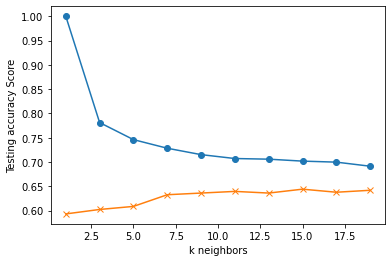

In [11]:
#loop diff k values to see which has the highest accuracy
#(only use odd numbers, don't want ties)

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
#K:11 provides best accuracy where classifier starts to stablize
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % model.score(X_test_scaled, y_test))

k=9 Test Acc: 0.640


In [13]:
new_data = [[4.3, 3.2, 1.3, 0.2, 1.3]]
predicted_class = model.predict(new_data)
print(predicted_class)
model

['FALSE POSITIVE']


KNeighborsClassifier(n_neighbors=11)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [14]:
# Train the model with GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 5, 10, 50],
              'weights' : ['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3, cv = 3, n_jobs = 1)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV 2/3] END metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV 3/3] END metric=euclidean, n

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 50],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}
0.582109594436054


# Save the Model

In [16]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'mode_2_knn.sav'
joblib.dump(model, filename)

['mode_2_knn.sav']